# Clarification on Lab 13 {.unnumbered}

In problem 2 when trying to find the unknown "room" temperature, we completely
overlooked the very obvious solution. We realize now that the value of $T_0$ was
simply the zero of the linear regression line, found with $-b/m$.

# Introduction

In [ ]:
from math import *

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Problem 1

To find the emissivity of the three aluminum cylinders (white, black, and bare
metal), an analysis of heat transfer is done. All three cylinders start with no
internal energy.

$$ E = 0 $$

All are then heated by the environment (the boiling water). No mechanical work
is done. This is the inital energy state of the cylinders.

$$ E = Q_i = cm\Delta T $$

The cylinders are then set to cool with the assumption that room temperature is
constant and there is no external airflow. It is also assumed that the cylinders
conduct no heat to other solids and that only radiation and natural convection
take place. So, the rate of change of the internal heat (from the initial heat,
$Q_i$) is given by:

$$ \frac{dQ}{dt} = \frac{dQ_{\mathrm{rad}}}{dT} + \frac{dQ_{\mathrm{conv}}}{dT} $$

$$ \frac{dQ_{\mathrm{rad}}}{dT} = \varepsilon \sigma A (T^4_{\mathrm{cyl}} -
T^4_{\mathrm{air}}) $$

$$ \frac{dQ_{\mathrm{conv}}}{dT} = hA(T_{\mathrm{cyl}} - T_{\mathrm{air}}) $$

***

$$ Q = cm\Delta T \implies dQ = cm\;dT $$

$$ cm \frac{dT}{dt} = \frac{dQ_{\mathrm{rad}}}{dT} + \frac{dQ_{\mathrm{conv}}}{dT} $$

$$ \frac{dT}{dt} = \frac{1}{cm}\left(\varepsilon \sigma A (T^4_{\mathrm{cyl}} -
T^4_{\mathrm{air}}) + hA(T_{\mathrm{cyl}} - T_{\mathrm{air}}) \right) $$

For aluminum, $c = 900\;\mathrm{J/kg}$. Finding the value of $h$ is ignored for
now. $A$ is just the surface area of the cylinder, $2\pi R (H+R)$.

## Solving the Non-Linear Differential Equation

The above differential equation is non-linear and can't be solved as a function
of time. One possible method is to approximate $T^4_{\mathrm{cyl}} -
T^4_{\mathrm{air}}$ (the non-linear component of the equation) using a
first-order Taylor expansion around some value $T_m$.

$$ f(T_{\mathrm{cyl}}) = T^4_{\mathrm{cyl}} - T^4_{\mathrm{air}} $$

$$ f(T_{\mathrm{cyl}}) \approx (T^4_{\mathrm{m}} - T^4_{\mathrm{air}}) +
4T_m^3(T_{\mathrm{cyl}}-T_m) $$

The first-order Taylor expansion only gives an equation for the tangent line and
is not the most accurate approximation, as can be seen on the plot.



(-10.0, 110.0)

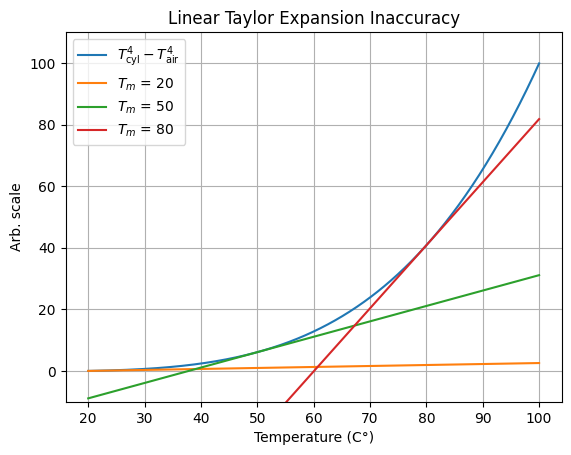

In [128]:
t_air = 20  # C
t_m_vals = [20, 50, 80]  # C

t = np.linspace(20, 100, 1000)

plt.plot(t, 1e-6 * (t**4 - t_air**4),label=r"$T_{\mathrm{cyl}}^4 - T_{\mathrm{air}}^4$")

for t_m in t_m_vals:
    label_str = r"$T_m$ = " + str(t_m)
    plt.plot(t, 1e-6 * ((t_m**4 - t_air**4) + (4 * t_m ** 3) * (t-t_m)), label=label_str)

plt.xlabel("Temperature (C°)")
plt.ylabel("Arb. scale")
plt.title("Linear Taylor Expansion Inaccuracy")
plt.legend()
plt.grid()
plt.ylim([-10,110])

Assuming the temperature range in the data is between 100 and 20 degrees, there
may be a certain value of $T_m$ that minimizes the error. The minimum error
function should have the smallest integral of difference (accumulation of
absolute error) with the actual function. So, finding the best value of $T_m$
looks like finding the minimum of the following function:

$$ g(T_m) = \left| \int_{20}^{100} \left( (T^4_{\mathrm{cyl}} - T^4_{\mathrm{air}}) -
(T^4_{\mathrm{m}} - T^4_{\mathrm{air}}) + 4T_m^3(T_{\mathrm{cyl}}-T_m) \;
\right) dT_{\mathrm{cyl}} \right|$$

$$ g(T_m) = \left| \int_{20}^{100} \left( T^4_{\mathrm{cyl}} - T^4_{\mathrm{m}}
+ 4T_m^3(T_{\mathrm{cyl}}-T_m) \; \right) dT_{\mathrm{cyl}} \right|$$

$$ g(T_m) = \left| \int_{20}^{100} \left( T^4_{\mathrm{cyl}} - T^4_{\mathrm{m}}
+ 4T_m^3T_{\mathrm{cyl}}-4T_m^4 \; \right) dT_{\mathrm{cyl}} \right| $$

$$ g(T_m) = \left| \int_{20}^{100} \left( T^4_{\mathrm{cyl}} +
4T_m^3T_{\mathrm{cyl}}-5T_m^4 \; \right) dT_{\mathrm{cyl}} \right| $$

$$ g(T_m) = \left| \left(\frac{1}{5}T^5_{\mathrm{cyl}} + 2T_m^3
T_{\mathrm{cyl}}^2-5T_m^4T_{\mathrm{cyl}} \right) \Big|_{20}^{100} \right| $$

$$ g(T_m) = \left| \left(\frac{1}{5}100^5 + 2T_m^3
100^2-5T_m^4 100 \right) - \left(\frac{1}{5}20^5 + 2T_m^3 20^2-5T_m^4 20 \right)
\right| $$

ChatGPT says this becomes:

$$ g(T_m) = \left| -400T_m^4 + 19200T_m^3 + 1999994446.4 \right| $$

I could derive this and use the cubic formula to find the critical points and
test if they are local minima, but instead I decided to just plot the equation
between 20 and 100.


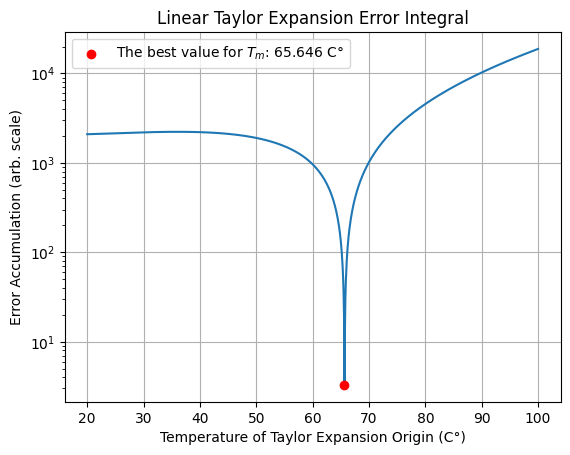

In [129]:
t = np.linspace(20, 100, 1000)
y = abs(1e-6 * (-400 * t**4 + 19200 * t**3 + 1999994446.4))
min_y = np.argmin(y)

label_str = r"The best value for $T_m$: " + str(round(t[min_y],3)) + " C°"

plt.semilogy(t, y)
plt.scatter(t[min_y],y[min_y],label=label_str,c='red',zorder=10)

plt.xlabel("Temperature of Taylor Expansion Origin (C°)")
plt.ylabel("Error Accumulation (arb. scale)")
plt.title("Linear Taylor Expansion Error Integral")
plt.grid()
plt.legend()

Using this newly found "best" value of $T_m$, where the error cancels out, the
differential equation can be solved. The equation

$$ \frac{dT}{dt} = \frac{1}{cm}\left(\varepsilon \sigma A (T^4_{\mathrm{cyl}} -
T^4_{\mathrm{air}}) + hA(T_{\mathrm{cyl}} - T_{\mathrm{air}}) \right) $$

becomes

$$ \frac{dT}{dt} \approx \frac{1}{cm}\left(\varepsilon \sigma A ((T^4_{\mathrm{m}} -
T^4_{\mathrm{air}}) + 4T_m^3(T_{\mathrm{cyl}}-T_m)) + hA(T_{\mathrm{cyl}} -
T_{\mathrm{air}}) \right) $$

Skipping the simplifications done on paper ($T=T_{\mathrm{cyl}}$):

$$ \frac{dT}{dt} \approx \frac{A}{cm}(h+\varepsilon\sigma 4 T_m^3) T +
\frac{A}{cm}(-3\varepsilon\sigma T_m^4 - \varepsilon\sigma T^4_{\mathrm{air}} -
hT_{air}) $$

This is a first-order linear differential equation in the form of:

$$ \dot y = my + b $$

which becomes

$$ y(x) = -\frac{b}{m} + Ce^{mx} $$

The solution is thus:

$$ T(t) = -\frac{-3\varepsilon\sigma T_m^4 - \varepsilon\sigma
T^4_{\mathrm{air}} - hT_{air}}{h+\varepsilon\sigma 4 T_m^3} +
C\exp\left(\frac{A}{cm}(h + \varepsilon\sigma 4 T_m^3)t\right)$$

where $C$ can be found, since $T(0)$ is known.

$$ T_0 = -\frac{-3\varepsilon\sigma T_m^4 - \varepsilon\sigma T^4_{\mathrm{air}}
- hT_{air}}{h+\varepsilon\sigma 4 T_m^3} + C $$

$$ C = T_0 + \frac{-3\varepsilon\sigma T_m^4 - \varepsilon\sigma T^4_{\mathrm{air}}
- hT_{air}}{h+\varepsilon\sigma 4 T_m^3} $$

**Plugging all of this into the Ultimate Equation:**

$$ \boxed{T(t) = \left(T_0 + \frac{-3\varepsilon\sigma T_m^4 - \varepsilon\sigma
T^4_{\mathrm{air}}
- hT_{air}}{h+\varepsilon\sigma 4 T_m^3}\right)\exp\left(\frac{A}{cm}(h +
  \varepsilon\sigma 4 T_m^3)t\right) -\frac{-3\varepsilon\sigma T_m^4 -
\varepsilon\sigma T^4_{\mathrm{air}} - hT_{air}}{h+\varepsilon\sigma 4 T_m^3}} $$

(Which, for curve fitting, follows this form.)

$$ T(t) = ae^{bt} + c $$

The emissivity is solved for on paper; using $c$ (which has the same output as
all the other coefficients when finding $\varepsilon$), the equation is:

$$ \varepsilon =
\frac{h(c-T_{\mathrm{air}})}{-\sigma(4cT^3_m+3T^4_m+T^4_{\mathrm{air}})} $$

Unmentioned till now, $h$ can be assumed to be 10, which is about the heat
transfer coefficient of stagnet air. 


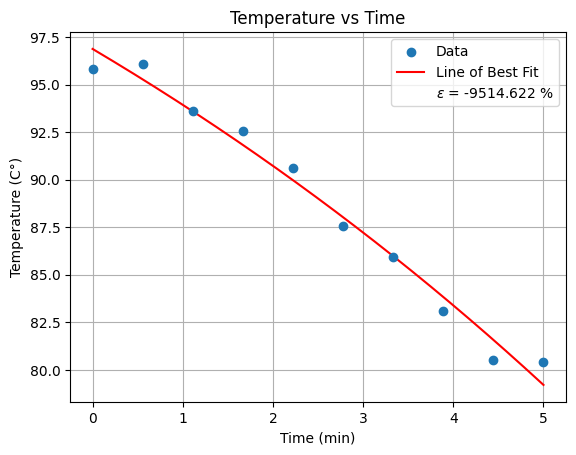

In [130]:
# Actual data
time = np.linspace(0, 5, 10, dtype=np.float128) # minutes
temp = (60) * 1.3 * np.exp(-0.05 * time) + 20

noise = np.random.normal(-1, 1, 10)
temp += noise


# Modified from Lab 11
def fit(tt: np.ndarray, yy: np.ndarray):

    def func(t, a, b, c):
        return a * np.exp(-b * t) + c

    # HACK maxfev too high, not optimal algorithm
    popt, pcov = curve_fit(func, tt, yy, maxfev=10000)
    a, b, c = popt
    fitfunc = lambda t: a * np.exp(-b * t) + c

    return {
        "a": a,
        "b": -b,
        "c": c,
        "fitfunc": fitfunc,
        "maxcov": np.max(pcov),
        "rawres": (popt, pcov),
    }


fitdict = fit(time, temp)

a, b, c = fitdict["a"], fitdict["b"], fitdict["c"]

t_m = t[min_y]  # C
h = 10
sigma = 5.670374419e-8
t_air = 20  # C

e = ( h * (c - t_air)) / (-sigma*(4*c*(t_m**3) + 3*(t_m**4) + t_air**4))

plt.scatter(time, temp, label="Data", zorder=10)
plt.plot(
    np.linspace(0, 5, 1000),
    fitdict["fitfunc"](np.linspace(0, 5, 1000)),
    c="red",
    label="Line of Best Fit",
)
label_str = r"$\varepsilon$ = " + str(round(100*e,3)) + " %"
plt.plot([],[],' ', label=label_str)

plt.xlabel("Time (min)")
plt.ylabel("Temperature (C°)")
plt.title("Temperature vs Time")
plt.legend()
plt.grid()



## Second Attempt

I gave up on the above method because it's an absolute nightmare. Instead, given
the $T_{\mathrm{cyl}}$ (from here on, $T$) and time data, the derivative can be
found numerically. I am also done trying to do curve fitting with absolutely
every problem. Instead, I'll just take the average.

$$ \dot T = \frac{1}{cm}\left(\varepsilon \sigma A (T^4 -
T^4_{\mathrm{air}}) + hA(T - T_{\mathrm{air}}) \right) $$

$$ cm\dot T = \varepsilon \sigma A (T^4 - T^4_{\mathrm{air}}) + hA(T -
T_{\mathrm{air}}) $$

$$ cm\dot T - hA(T - T_{\mathrm{air}}) = \varepsilon \sigma A (T^4 -
T^4_{\mathrm{air}}) $$


$$ \boxed{\varepsilon = \frac{cm\dot T - hA(T - T_{\mathrm{air}})}{\sigma A (T^4
- T^4_{\mathrm{air}})}} $$

(Also, a note: When I did the Taylor expansion error integral, I should have had
the line shifted up or down by a second parameter, creating a 2D function to
then find the minimum of.)



/tmp/ipykernel_9825/3486328796.py:30: RuntimeWarning: divide by zero encountered in divide
  emissivity = 100 * (top / bottom)  # %


Bare Metal: avg e = inf %
White Paint: avg e = inf %
Black Paint: avg e = inf %


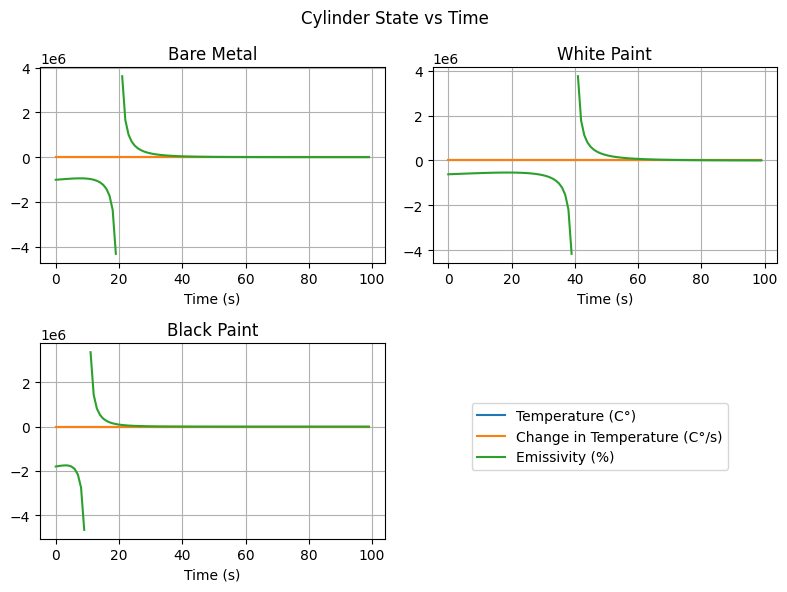

In [135]:
# Recorded data
time = np.array([n for n in range(100)])
temp = np.array(
    [
        [n for n in range(100)],
        [0.5 * n for n in range(100)],
        [2 * n for n in range(100)],
        [1.5 * n for n in range(100)],
    ]
)  # C

# Measurements
c = 900  # J/kg
m = 1  # kg
h = 1  # W/m^2K

temp_air = 20  # C
sigma = 5.670374419e-8  # W/m^2 K^4

R = 1  # m
H = 1  # m

d_temp = np.array([np.gradient(row, time) for row in temp])

# Calculations
A = 2 * pi * R * (H + R)

top = c * m * d_temp - h * A * (temp - temp_air)
bottom = sigma * A * (temp**4 - temp_air**4)
emissivity = 100 * (top / bottom)  # %

str_1 = "Temperature (C°)"
str_2 = "Change in Temperature (C°/s)"
str_3 = "Emissivity (%)"

titles = ["Bare Metal", "White Paint", "Black Paint", ""]

fig, axes = plt.subplots(2, 2, figsize=(8, 6))

i = 0
for ax_part in axes:
    for ax in ax_part:
        if i == 3:
            ax.axis("off")
        else:
            ax.plot(time, temp[i])
            ax.plot(time, d_temp[i])
            ax.plot(time, emissivity[i])
            ax.set_xlabel("Time (s)")
            ax.set_title(titles[i])
            ax.grid()
        i += 1

fig.legend([str_1, str_2, str_3], loc="lower right", bbox_to_anchor=(0.925, 0.2))
fig.suptitle("Cylinder State vs Time")
fig.tight_layout()

hack = [
    print(title + ": avg e = " + str(float(np.mean(em))) + " %")
    for em, title in zip(emissivity, titles)
    if title != ""
]

## Analysis

# Problem 2

## Analysis

# Problem 3


## Analysis

# Conclusion